In [1]:

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


# Load the dataset into a DataFrame
file_path = r'C:\Users\junai\Documents\Kajji\COLLEGE\SEM 5\ML\data.csv'
df = pd.read_csv(file_path)
# Check for missing values
missing_values = df.isnull().sum()

# Print columns with missing values and their counts
print(missing_values[missing_values > 0])
# Remove rows with missing values
df_cleaned = df.dropna()
# Impute missing values with the mean of each column
df_imputed = df.fillna(df.mean())
df.describe()
# Select numerical columns to standardize
numerical_cols = ['Spike extension', 'SPIKE GL PIG', 'Days to 50% flowering',
                  'Leaf sheath length', 'Spike length', 'Spike girth', 'Plant height', '1000 Seed weight']


# Extract the feature matrix 'X' from the DataFrame
X = df[numerical_cols]
# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Instantiate the clustering algorithms
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
agglomerative = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
gmm = GaussianMixture(n_components=3)

# Fit the algorithms to your data
kmeans.fit(X)
agglomerative.fit(X)
dbscan.fit(X)
gmm.fit(X)

algorithms = [kmeans, agglomerative, dbscan, gmm]
algorithm_names = ['K-Means', 'Agglomerative', 'DBSCAN', 'GMM']

metrics = {
    'ARI': adjusted_rand_score,
    'NMI': normalized_mutual_info_score,
    'FMI': fowlkes_mallows_score,
    'Silhouette': silhouette_score,
    'Davies-Bouldin': davies_bouldin_score,
    'Calinski-Harabasz': calinski_harabasz_score
}

results = {}

for algorithm, name in zip(algorithms, algorithm_names):
    algorithm.fit(X)
    labels = algorithm.labels_
    results[name] = {}
    results[name]['Silhouette'] = silhouette_score(X, labels)
    results[name]['Davies-Bouldin'] = davies_bouldin_score(X, labels)
    results[name]['Calinski-Harabasz'] = calinski_harabasz_score(X, labels)
# Display or visualize the metric scores in 'results'
# Create dataframes from the results dictionary for visualization
results_df = pd.DataFrame(results).T

# Plot the metric scores
plt.figure(figsize=(12, 6))
for metric in metrics.keys():
    plt.subplot(2, 3, list(metrics.keys()).index(metric) + 1)
    results_df[metric].plot(kind='bar', title=metric)
    plt.ylabel(metric)

plt.tight_layout()
plt.show()


S.NO                2
Spike extension     2
SPIKE GL PIG        2
Bristle presence    2
Spike shape         2
Spike sterility     2
Spike density       2
Seed colour         2
Seed shape          2
YIELD               2
dtype: int64


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

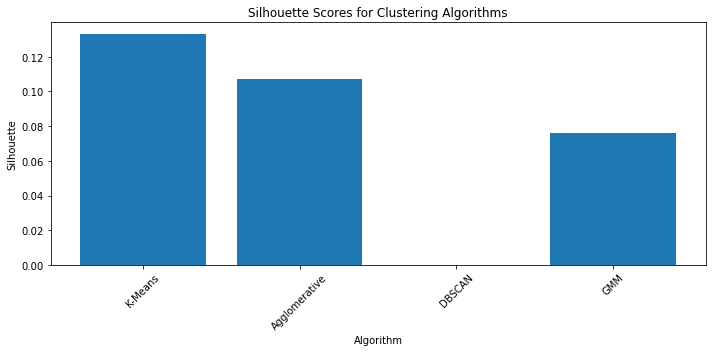

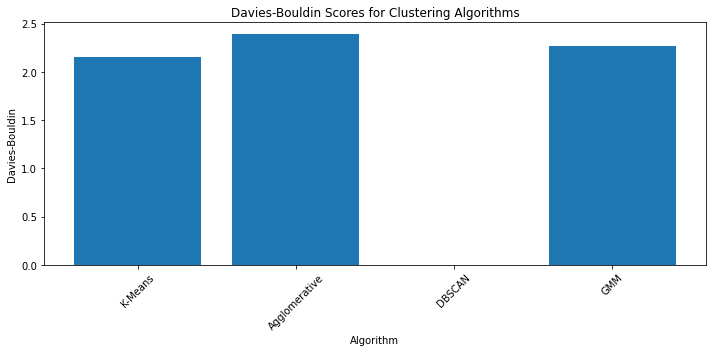

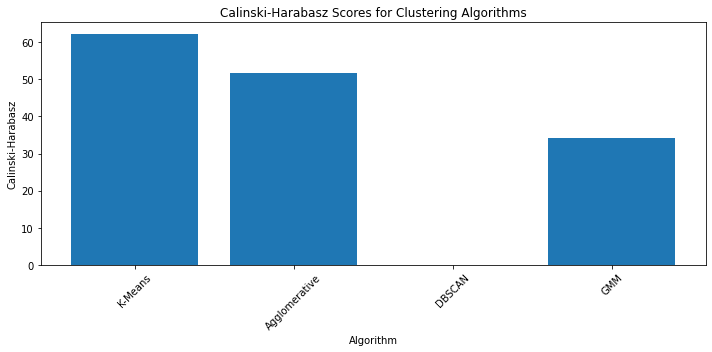

In [19]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
file_path = r'C:\Users\junai\Documents\Kajji\COLLEGE\SEM 5\ML\data.csv'
df = pd.read_csv(file_path)

# Handle missing values (choose one of the following options)
# Option 1: Remove rows with missing values
df_cleaned = df.dropna()

# Option 2: Impute missing values with the mean
df_imputed = df.fillna(df.mean())

# Select numerical columns to standardize
numerical_cols = ['Spike extension', 'SPIKE GL PIG', 'Days to 50% flowering',
                  'Leaf sheath length', 'Spike length', 'Spike girth', 'Plant height', '1000 Seed weight']

# Extract the feature matrix 'X' from the DataFrame
X = df_cleaned[numerical_cols]  # or X = df_imputed[numerical_cols]

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
X_scaled = scaler.fit_transform(X)

# Instantiate the clustering algorithms
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters, make sure it's at least 2
agglomerative = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
gmm = GaussianMixture(n_components=3)  # You can also adjust the number of components for GMM

# Define a function to calculate silhouette score and handle clusters with one sample
def calculate_silhouette_score(X, labels):
    unique_labels = set(labels)
    if len(unique_labels) == 1:
        return 0  # Return 0 for clusters with one sample
    return silhouette_score(X, labels)
# Fit the algorithms to your scaled data and calculate silhouette score
algorithms = [kmeans, agglomerative, dbscan, gmm]
algorithm_names = ['K-Means', 'Agglomerative', 'DBSCAN', 'GMM']

results = {}

for algorithm, name in zip(algorithms, algorithm_names):
    algorithm.fit(X_scaled)
    
    # For K-Means and Agglomerative, you can directly access labels_ attribute
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_
    else:
        # For DBSCAN and Gaussian Mixture, use the predict method
        labels = algorithm.predict(X_scaled)
    
    results[name] = {}
    results[name]['Silhouette'] = calculate_silhouette_score(X_scaled, labels)
    
    # Check if there are at least 2 clusters for the davies_bouldin_score and calinski_harabasz_score
    if len(set(labels)) >= 2:
        results[name]['Davies-Bouldin'] = davies_bouldin_score(X_scaled, labels)
        results[name]['Calinski-Harabasz'] = calinski_harabasz_score(X_scaled, labels)
    else:
        results[name]['Davies-Bouldin'] = None  # Set to None if not enough clusters
        results[name]['Calinski-Harabasz'] = None  # Set to None if not enough clusters


# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results).T

# Define the metrics you want to compare
metrics_to_compare = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']

# Plot the metric scores for each algorithm
for metric in metrics_to_compare:
    plt.figure(figsize=(10, 5))
    plt.bar(results_df.index, results_df[metric])
    plt.title(f'{metric} Scores for Clustering Algorithms')
    plt.xlabel('Algorithm')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [1]:
%pwd

'C:\\Users\\junai'

In [2]:
cd C:\\Users\\junai\\Documents\\Kajji\\COLLEGE\\SEM 5\\ML

C:\Users\junai\Documents\Kajji\COLLEGE\SEM 5\ML


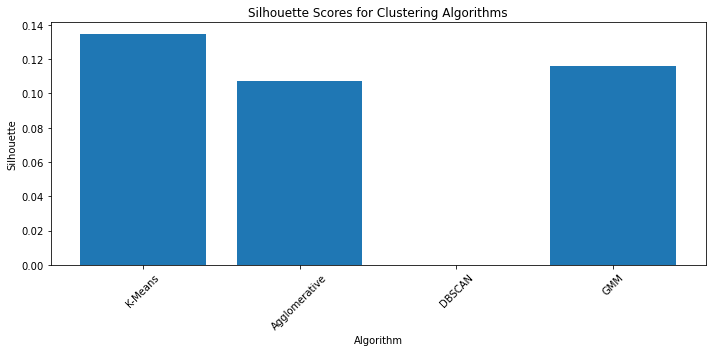

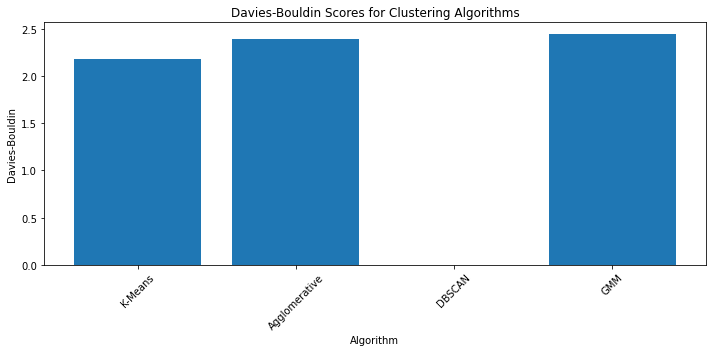

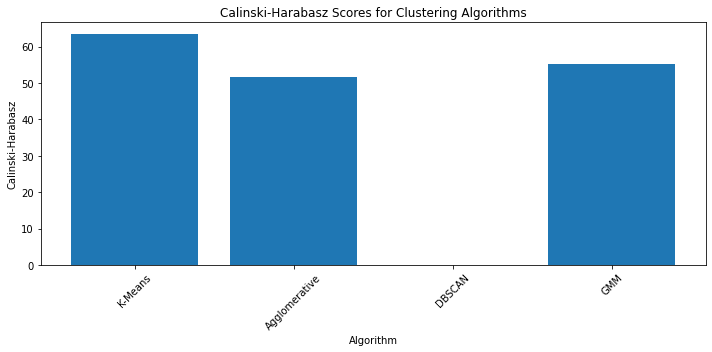

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
file_path = r'C:\Users\junai\Documents\Kajji\COLLEGE\SEM 5\ML\data.csv'
df = pd.read_csv(file_path)

# Handle missing values (choose one of the following options)
# Option 1: Remove rows with missing values
df_cleaned = df.dropna()

# Option 2: Impute missing values with the mean
df_imputed = df.fillna(df.mean())

# Select numerical columns to standardize
numerical_cols = ['Spike extension', 'SPIKE GL PIG', 'Days to 50% flowering',
                  'Leaf sheath length', 'Spike length', 'Spike girth', 'Plant height', '1000 Seed weight']

# Extract the feature matrix 'X' from the DataFrame
X = df_cleaned[numerical_cols]  # or X = df_imputed[numerical_cols]

# Instantiate the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
X_scaled = scaler.fit_transform(X)

# Instantiate the clustering algorithms
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters, make sure it's at least 2
agglomerative = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.5, min_samples=5)
gmm = GaussianMixture(n_components=3)  # You can also adjust the number of components for GMM

# Define a function to calculate silhouette score and handle clusters with one sample
def calculate_silhouette_score(X, labels):
    unique_labels = set(labels)
    if len(unique_labels) == 1:
        return 0  # Return 0 for clusters with one sample
    return silhouette_score(X, labels)
# Fit the algorithms to your scaled data and calculate silhouette score
algorithms = [kmeans, agglomerative, dbscan, gmm]
algorithm_names = ['K-Means', 'Agglomerative', 'DBSCAN', 'GMM']

results = {}

for algorithm, name in zip(algorithms, algorithm_names):
    algorithm.fit(X_scaled)
    
    # For K-Means and Agglomerative, you can directly access labels_ attribute
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_
    else:
        # For DBSCAN and Gaussian Mixture, use the predict method
        labels = algorithm.predict(X_scaled)
    
    results[name] = {}
    results[name]['Silhouette'] = calculate_silhouette_score(X_scaled, labels)
    
    # Check if there are at least 2 clusters for the davies_bouldin_score and calinski_harabasz_score
    if len(set(labels)) >= 2:
        results[name]['Davies-Bouldin'] = davies_bouldin_score(X_scaled, labels)
        results[name]['Calinski-Harabasz'] = calinski_harabasz_score(X_scaled, labels)
    else:
        results[name]['Davies-Bouldin'] = None  # Set to None if not enough clusters
        results[name]['Calinski-Harabasz'] = None  # Set to None if not enough clusters


# Create a DataFrame from the results dictionary
results_df = pd.DataFrame(results).T

# Define the metrics you want to compare
metrics_to_compare = ['Silhouette', 'Davies-Bouldin', 'Calinski-Harabasz']

# Plot the metric scores for each algorithm
for metric in metrics_to_compare:
    plt.figure(figsize=(10, 5))
    plt.bar(results_df.index, results_df[metric])
    plt.title(f'{metric} Scores for Clustering Algorithms')
    plt.xlabel('Algorithm')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



In [4]:
%pwd


'C:\\Users\\junai\\Documents\\Kajji\\COLLEGE\\SEM 5\\ML'